In [10]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [11]:
## Import the dataset and visualise head

baselineTrainingData = pd.read_csv('baseline_model_training_information_CLEANED.csv')
baselineTrainingData = baselineTrainingData.drop(index=0) # Drop the first row (which contains units and useless information)

baselineTrainingData.columns = ['Epoch', 'Iteration', 'Time Elapsed', 'Mini-batch Accuracy', 'Validation Accuracy', 'Mini-batch Loss', 'Validation Loss', 'Base Learning'] # Reset the column names

baselineTrainingData.head() # Show the header of the dataframe

,Epoch,Iteration,Time Elapsed,Mini-batch Accuracy,Validation Accuracy,Mini-batch Loss,Validation Loss,Base Learning
1,1,1,00:00:14,26.56%,68.12%,1.8097,1.2415,0.0034
2,1,2,00:00:26,64.06%,66.32%,1.6281,1.1588,0.0034
3,1,3,00:00:37,64.06%,64.10%,1.1639,1.1236,0.0034
4,1,4,00:00:48,62.50%,71.94%,0.9727,0.8634,0.0034
5,1,5,00:01:01,65.62%,73.68%,1.2736,0.7815,0.0034


In [12]:
## Convert data in the dataframe to numerical values (not strings)

'''
There are two types of strings to convert. This first is simply just 
'x' and the other is 'x.xx%'. A different approach is needed to convert
them to useful values for plotting
'''

# 1: Type of 'x'
columnsToConvert = ['Epoch', 'Iteration', 'Mini-batch Loss', 'Validation Loss', 'Base Learning'] # Identify columns to be turned into numerical values

baselineTrainingData[columnsToConvert] = baselineTrainingData[columnsToConvert].apply(pd.to_numeric) # Convert the identifed columns to numeric values

# 2: Type of 'x.xx%'``
columnsToConvert_Percentage = ['Mini-batch Accuracy', 'Validation Accuracy'] # Identify columns with 'Percentage' values

baselineTrainingData[columnsToConvert_Percentage] = baselineTrainingData[columnsToConvert_Percentage].apply( lambda col: col.str.replace('%','').astype(float)) # Convert all to numerical values

baselineTrainingData.head()


,Epoch,Iteration,Time Elapsed,Mini-batch Accuracy,Validation Accuracy,Mini-batch Loss,Validation Loss,Base Learning
1,1,1,00:00:14,26.56,68.12,1.8097,1.2415,0.0034
2,1,2,00:00:26,64.06,66.32,1.6281,1.1588,0.0034
3,1,3,00:00:37,64.06,64.10,1.1639,1.1236,0.0034
4,1,4,00:00:48,62.50,71.94,0.9727,0.8634,0.0034
5,1,5,00:01:01,65.62,73.68,1.2736,0.7815,0.0034


In [13]:
## Creating smoothed dataset for easier visualisation
iterations = list(baselineTrainingData['Iteration']) # Create list containing iterations
trainingAccuracy = list(baselineTrainingData['Mini-batch Accuracy']) # Create list containing mini-batch accuracy data
validationAccuracy = list(baselineTrainingData['Validation Accuracy']) # Create list containing validation accuracy data

smoothedIterations = [iterations[0]] # Initialise list to hold smoothed iteration indexes
smoothedTrainingAccuracy = [trainingAccuracy[0]] # Initialise list to hold smoothed training accuracy
smoothedValidationAccuracy = [validationAccuracy[0]] # Initialise list to hold validation accuracies at smoothed iteration intervals

i = 4 # Create index to track position in list

while i < len(iterations):

    smoothedIterations.append(i) # Append the iteration

    smoothedValidationAccuracy.append(validationAccuracy[i]) # Append the accuracy for the current index

    trainingMovingAverage = statistics.mean(trainingAccuracy[(i-4):(i+4)]) # Calculate a moving average 

    smoothedTrainingAccuracy.append(trainingMovingAverage)

    i += 5 # Increment i by 5

print(len(smoothedIterations) == len(smoothedTrainingAccuracy)) # Test
print(len(smoothedIterations) == len(smoothedValidationAccuracy)) # Test

True
True


In [14]:
## Finding maximum validation point
maxValidationAccuracyIndex, maxValidationAccuracy = max(enumerate(smoothedValidationAccuracy), key=lambda x: x[1])
maxValidationAccuracy_iteration = smoothedIterations[maxValidationAccuracyIndex] # Find the iteration for maximum validation accuracy

print("Maximum Validation Accuracy of " + str(maxValidationAccuracy) + " at iteration " + str(maxValidationAccuracy_iteration))


Maximum Validation Accuracy of 87.99 at iteration 204


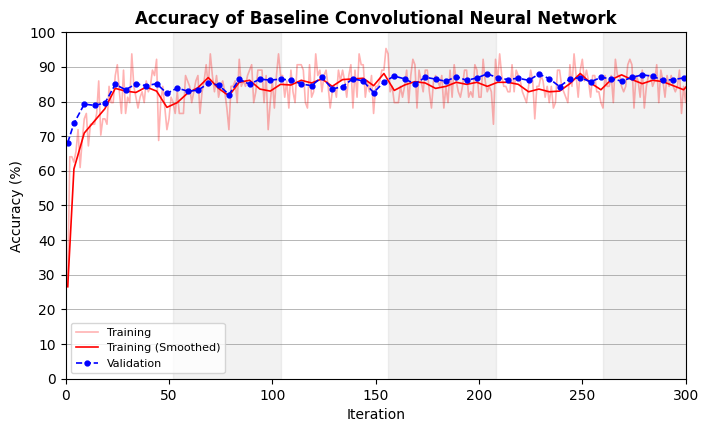

In [ ]:
## Plot all the accuracy data
plt.figure(figsize=(8, 4.5))
plt.plot(baselineTrainingData['Iteration'], baselineTrainingData['Mini-batch Accuracy'], label='Training', color='red', alpha=0.3, linewidth=1.2) # Plot the iterations
# plt.plot(baselineTrainingData['Iteration'], baselineTrainingData['Validation Accuracy'], label='Validation Accuracy', color='blue', alpha=0.5)
plt.plot(smoothedIterations, smoothedTrainingAccuracy, label='Training (Smoothed)', color='red', linewidth=1.2) # Plot Smoothed Training Accuracy
plt.plot(smoothedIterations, smoothedValidationAccuracy, label='Validation', color='blue', linewidth=1.2, marker='o', markersize=3.5, linestyle='--') # Plot Smoothed Accuracy for every 5 iterations

plt.axvspan(52, 104, color='gray', alpha=0.1) # Shade for Epoch 2
plt.axvspan(156, 208, color='gray', alpha=0.1) # Shade for Epoch 4
plt.axvspan(260, 312, color='gray', alpha=0.1) # Shade for Epoch 6
plt.axvspan(364, 416, color='gray', alpha=0.1) # Shade for Epoch 8

# Add labels, title, and legend
plt.xlabel('Iteration', fontsize=10) # Set the x-label
plt.ylabel('Accuracy (%)', fontsize=10) # Set the y-label
plt.yticks(np.arange(0, 101, 10)) # Create ticks for the plot

plt.title('Accuracy of Baseline Convolutional Neural Network', fontweight='bold', fontsize=12) # Set the title of the graph
plt.legend(fontsize=8) # Set the legend
plt.xlim(0, 300)
plt.ylim(0, 100)
plt.grid(color='gray', linewidth=0.5, alpha=0.8, axis='y') # Create a grid for the plot

plt.savefig('baseline_training_accuracy_1.png', dpi=1000, bbox_inches='tight') # Save the plot

plt.show() # Show the plot
